# Домашнее задание №3 - Реализация базового варианта линейной регрессии

## Часть 1. Ваша реализация (60 баллов)

В этой части домашки вам предстоит **реализовать класс LinearRegressionSGD**, который обучает линейную регрессию методом стохастического градиентного спуска (SGD). Класс должен поддерживать **L1, L2 и Elastic Net регуляризацию**. Помимо этого, необходимо реализовать методы для **визуализации процесса обучения**: график функции потерь по эпохам и распределение ошибок на той или иной эпохе.

Ниже представлен шаблон кода с пропусками, которые необходимо заполнить.


* вычисление лосса (15 баллов)
* изменения в функции fit (25 баллов)
* predict (5 баллов)
* графики (15 баллов)

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [249]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000, reg_type=None, reg_lambda=0.01, alpha=0.5):
        """
        Initialize the Linear Regression model with SGD.
        :param lr: Learning rate
        :param epochs: Number of training epochs
        :param reg_type: Regularization type ('l1', 'l2', 'elastic_net', or None)
        :param reg_lambda: Regularization strength
        :param alpha: Mixing parameter for elastic net (0: L2, 1: L1)
        """
        self.lr = lr
        self.epochs = epochs
        self.reg_type = reg_type
        self.reg_lambda = reg_lambda
        self.alpha = alpha
        self.theta = None
        self.loss_history = []
        self.test_loss_history = []
        self.error_history = []
    
    def _compute_loss(self, X, y):
        """Compute MSE loss with regularization."""
        # m = len(y)
        predictions = X.dot(self.theta)
        # YOUR CODE HERE
        loss = np.mean((y-predictions)**2)/2
        
        if self.reg_type == 'l2':
            loss += self.reg_lambda * np.sum(self.theta ** 2) / 2
        elif self.reg_type == 'l1':
            loss += self.reg_lambda * np.sum(np.abs(self.theta)) 
            # YOUR CODE HERE
        elif self.reg_type == 'elastic_net':
            l1 = self.reg_lambda * self.alpha * np.sum(np.abs(self.theta))
            l2 = self.reg_lambda * (1 - self.alpha) * np.sum(self.theta ** 2) / 2
            loss += l1 + l2
        return loss
    
    def fit(self, X, y, X_val=None, y_val=None):
        """Train the model using stochastic gradient descent."""
        m, n = X.shape
        self.theta = np.zeros(n)
        
        for epoch in range(self.epochs):
            errors = []
            for i in range(m):
                idx = np.random.randint(0, m)
                xi, yi = X[idx], y[idx]
                prediction = np.dot(xi, self.theta)
                error = prediction - yi
                errors.append(error)
                
                # Compute gradient
                gradient = xi * error
                
                # Apply regularization
                # YOUR CODE HERE
                if self.reg_type == 'l2':
                    gradient += self.reg_lambda * self.theta
                elif self.reg_type == 'l1':
                    gradient += self.reg_lambda * np.sign(self.theta)
            
                elif self.reg_type == 'elastic_net':
                    l1_dir = np.sign(self.theta) * self.alpha * self.reg_lambda
                    l2_dir = self.theta * (1-self.alpha) * self.reg_lambda
                    gradient += l1_dir+l2_dir

                # Update weights
                # YOUR CODE HERE
                self.theta -= self.lr * gradient
                
                
            # Compute loss at the end of each epoch
            # loss = self._compute_loss(X, y)
            # self.loss_history.append(loss)
            train_loss = self._compute_loss(X, y)
            self.loss_history.append(train_loss)

            if X_val is not None and y_val is not None:
                test_loss = self._compute_loss(X_val, y_val)
                self.test_loss_history.append(test_loss)

            # Store training loss
            self.error_history.append(errors)
            
    def predict(self, X):
        """Make predictions using the trained model."""
        return X.dot(self.theta)
    
    def plot_loss(self):
        """Plot the loss distribution over epochs."""
        # YOUR CODE HERE
        plt.figure(figsize=(10, 6))  # Устанавливаем размер графика

    # Строим график потерь по эпохам
        plt.plot(range(1, len(self.loss_history) + 1), self.loss_history, marker='o', color='b', label='Loss')
        if self.test_loss_history:
            plt.plot(range(1, len(self.loss_history) + 1), self.test_loss_history, color='orange', label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss distribution over epochs')
        plt.legend()
        plt.grid()
        plt.show()
    
    def plot_error_distribution(self, epoch):
        """Plot the distribution of errors for all points at each epoch."""
        # YOUR CODE HERE
        plt.figure(figsize=(10, 6))  # установка размера графика

        plt.hist(self.error_history[epoch], bins=30, alpha=0.7, edgecolor='black')

        plt.xlabel('Error')
        plt.ylabel('Frequency')
        plt.title(f'Error Distribution at Epoch {epoch}')
        plt.legend()
        plt.show()


## Часть 2. Проверяем вашу реализацию (25 баллов)

Теперь для полученного класса вам нужно будет посмотреть, **как ведет себя регрессия для разных вариантов регуляризации**. Советуем рассмотреть несколько наборов значений для каждого вида регуляризации, а также посмотреть на несколько значений learning rate. 
 
Ваша цель - **понять какие значения лучше или хуже подходят** в случае ваших данных.

В качестве данных вам предлагается использовать сгенерированные выборки. Ниже представлен код для генерации.

Идеальный график 'Loss distribution over epochs' будет показывать постоянное снижение значения потерь. Попробуем поменять параметры и посмотреть что лучше


In [250]:
sample_size = 500

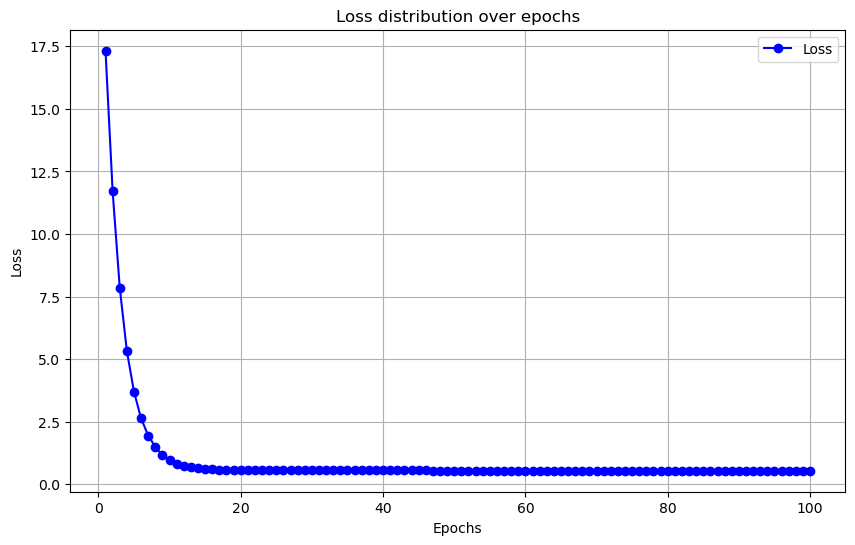

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


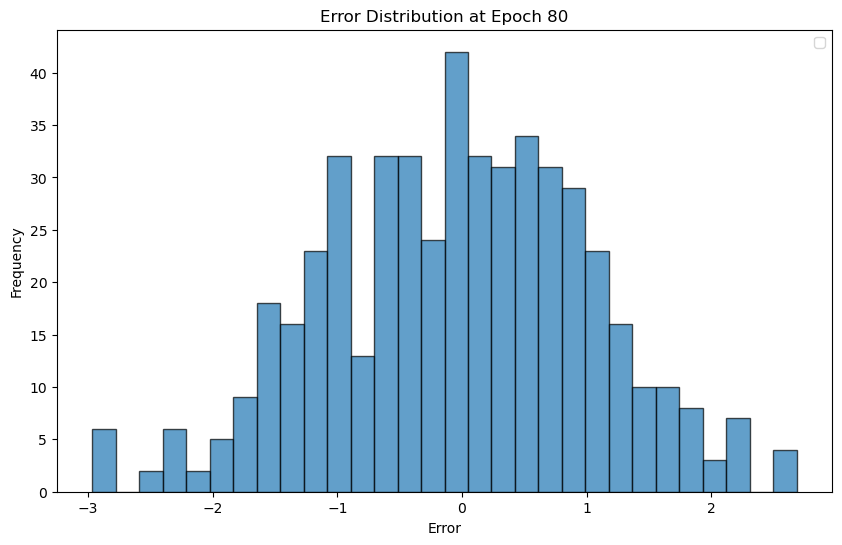

In [251]:
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.0002, epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

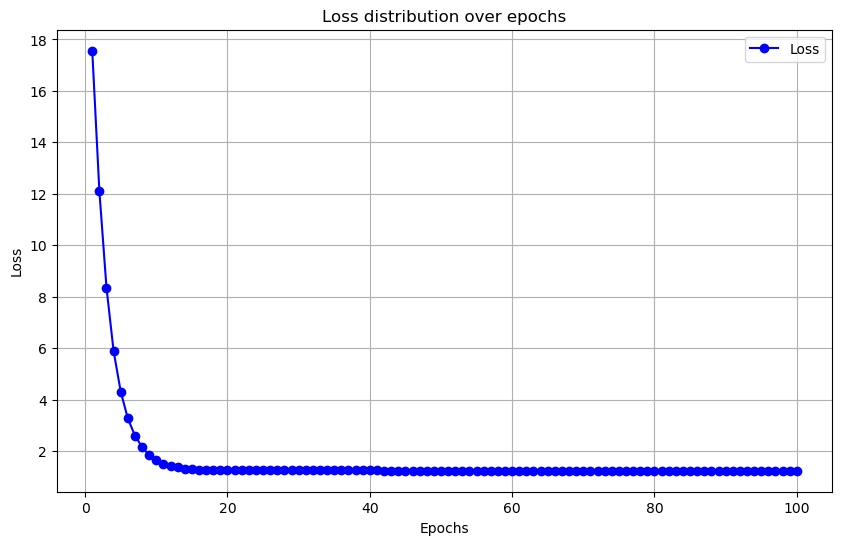

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


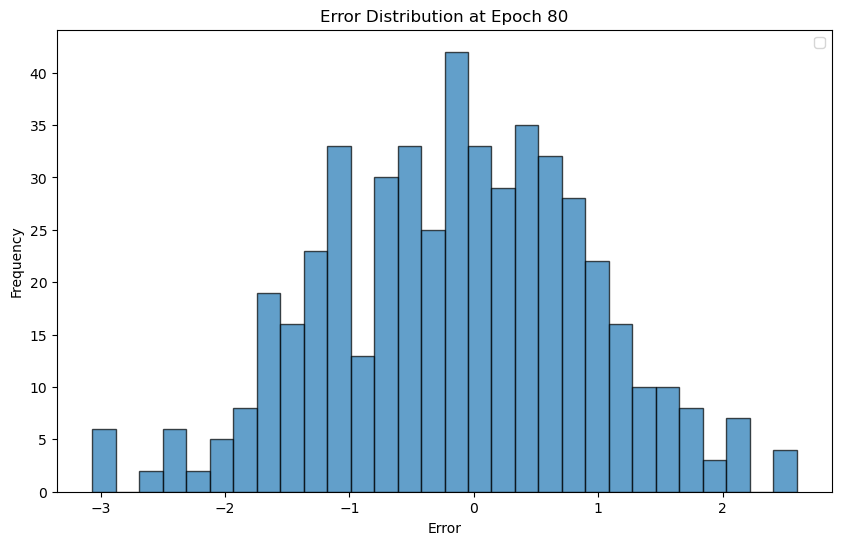

In [252]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.0002, reg_type="l1", epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

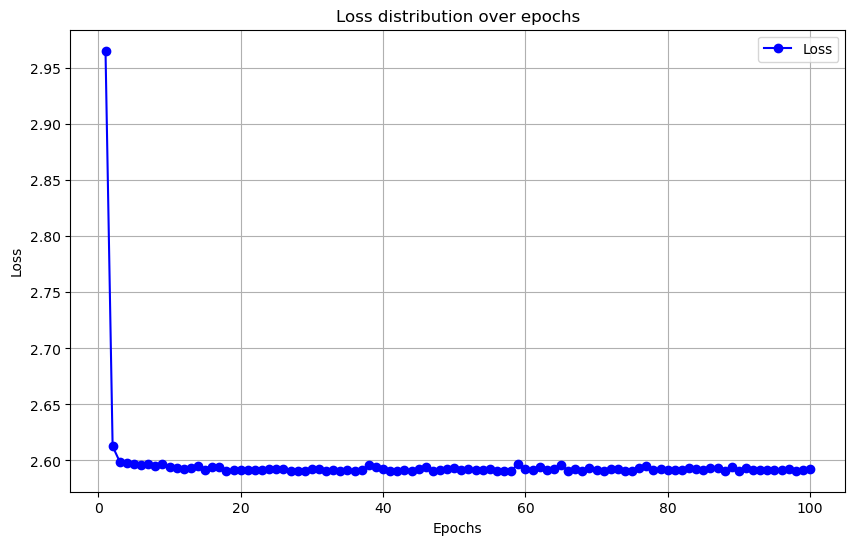

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


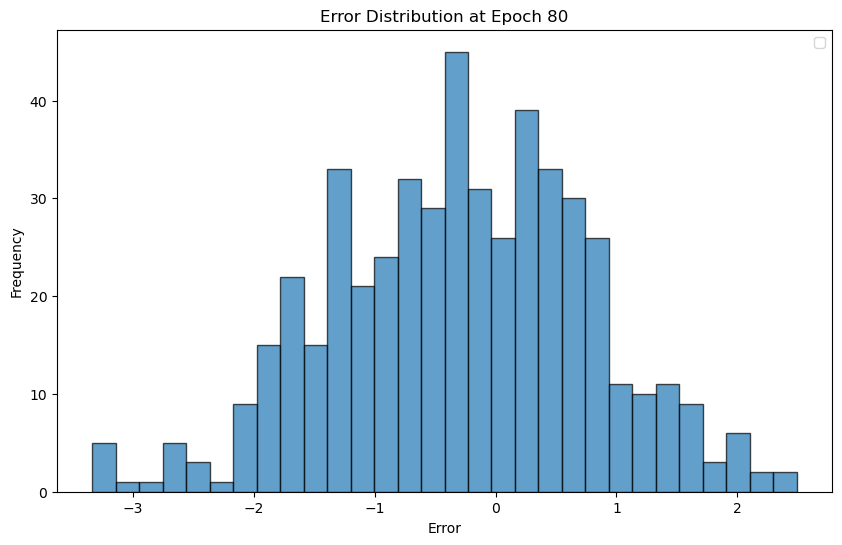

In [253]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="l1", epochs=100, reg_lambda=0.3, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

Это самый удачный learning rate

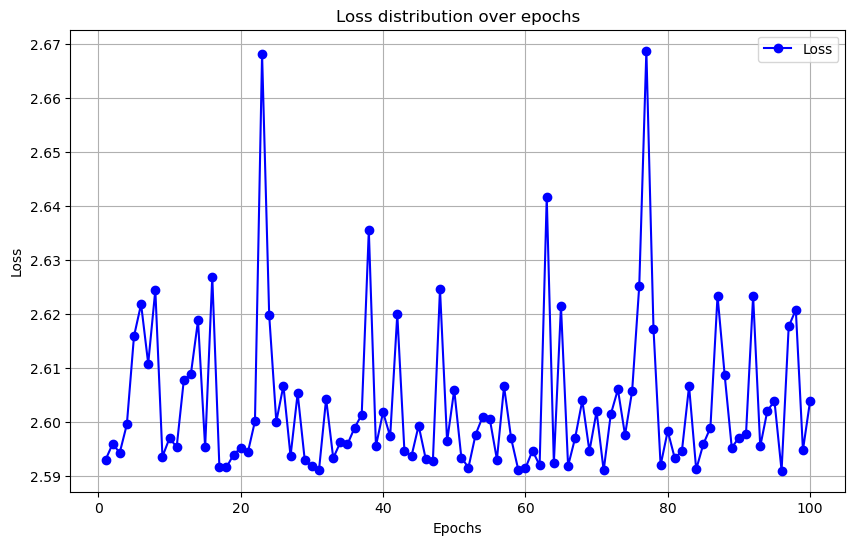

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


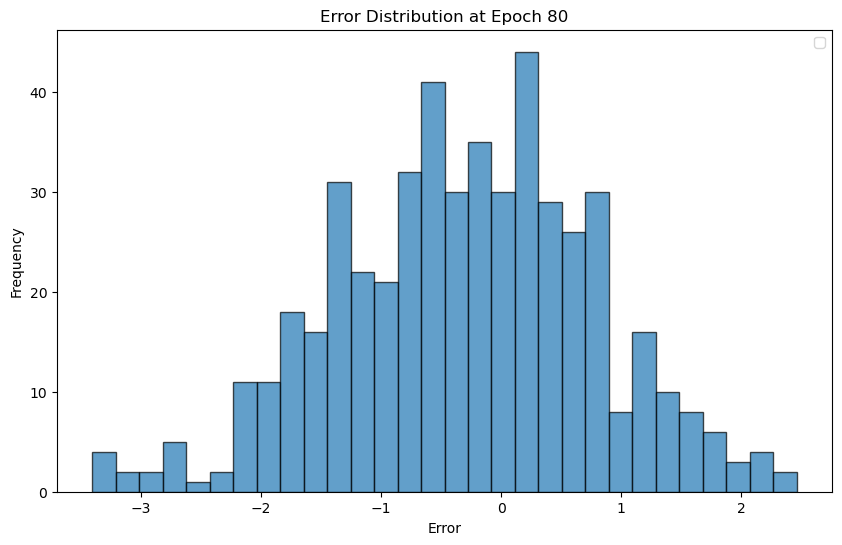

In [254]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.02, reg_type="l1", epochs=100, reg_lambda=0.3, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

При слишком высоком learning rate мы  ничему не учимся

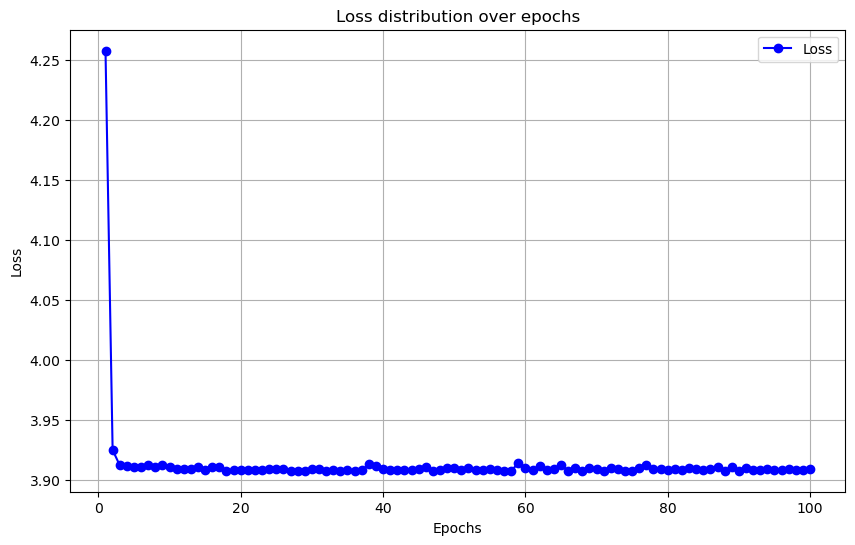

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


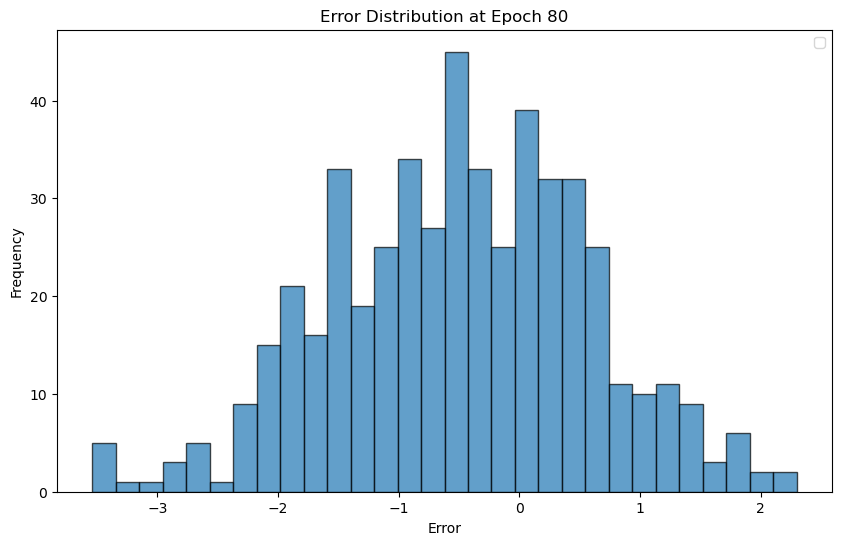

In [255]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="l1", epochs=100, reg_lambda=0.5, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

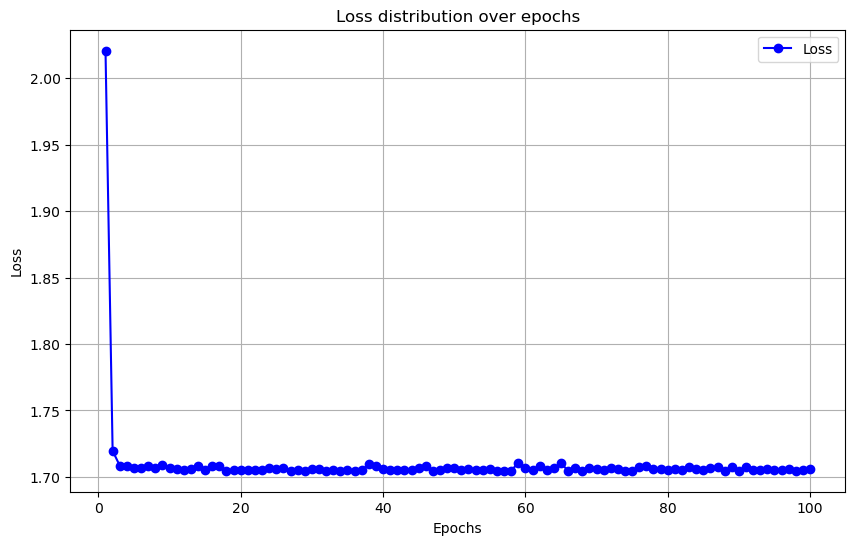

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


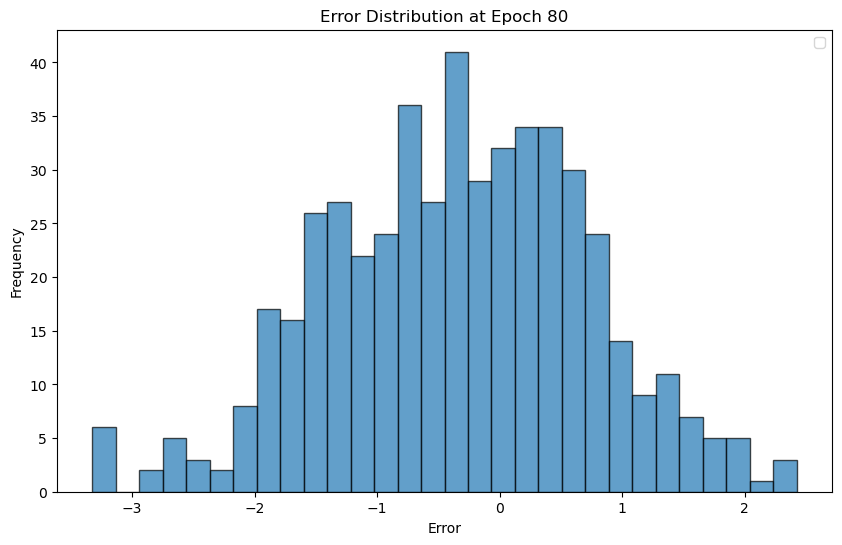

In [256]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="l2", epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

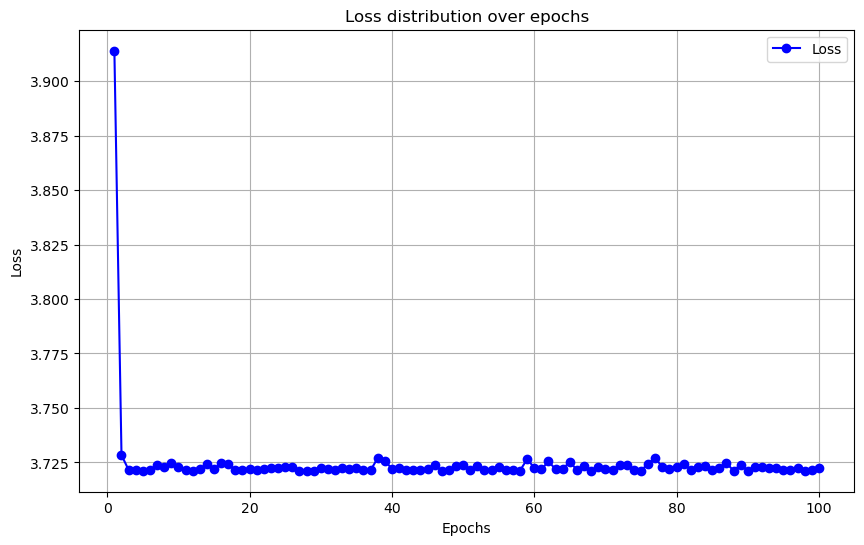

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


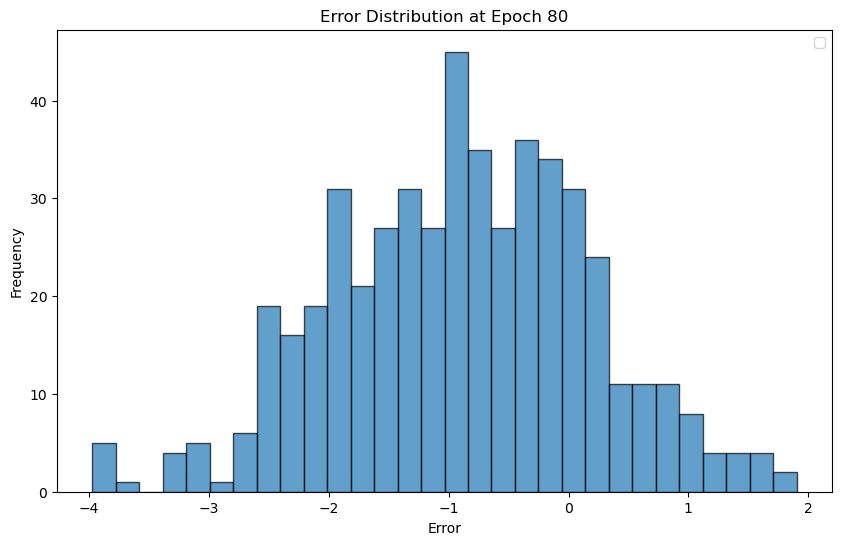

In [257]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="l2", epochs=100, reg_lambda=0.3, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

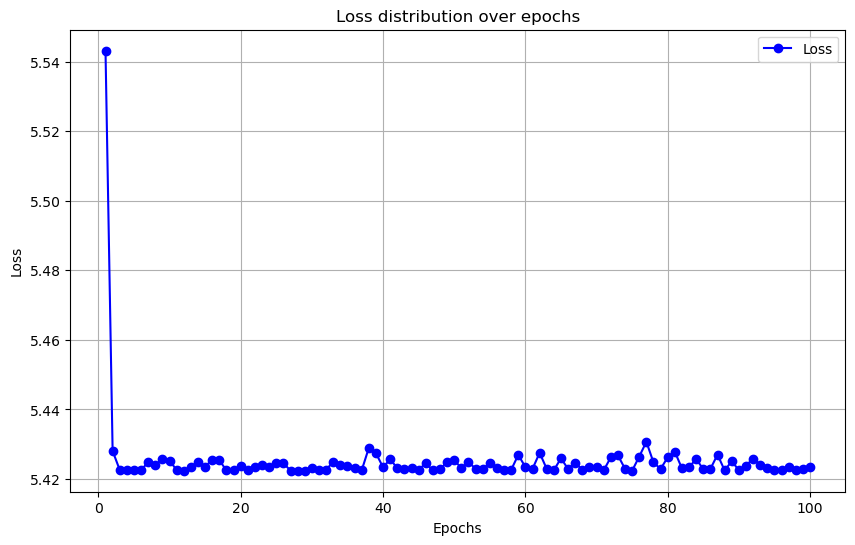

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


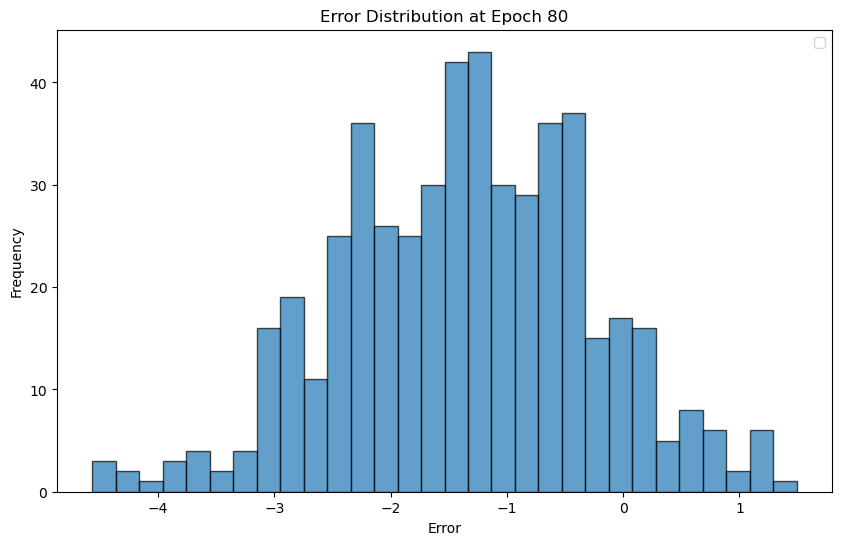

In [258]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="l2", epochs=100, reg_lambda=0.5, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

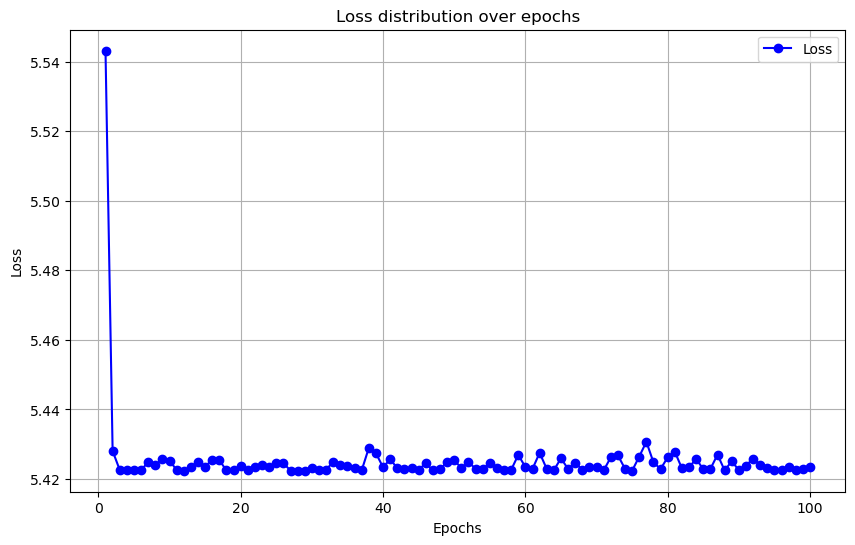

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


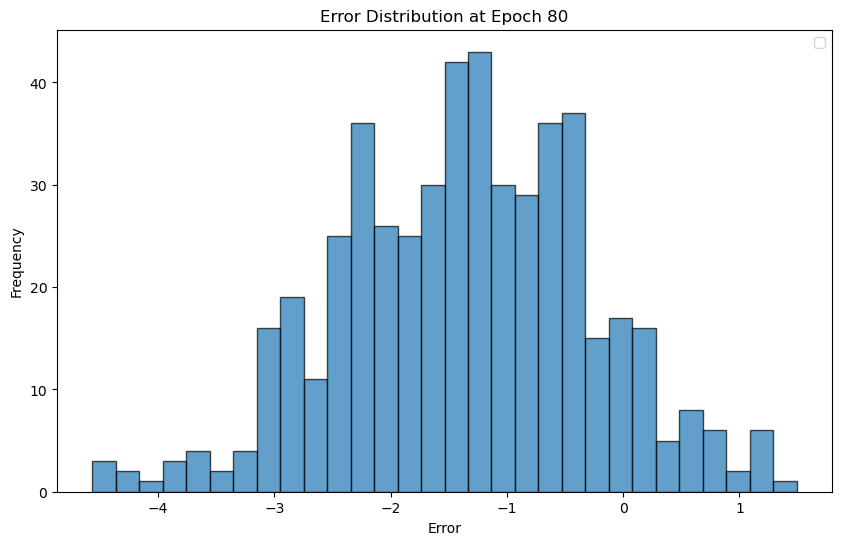

In [259]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="elastic_net", epochs=100, reg_lambda=0.5, alpha=0)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

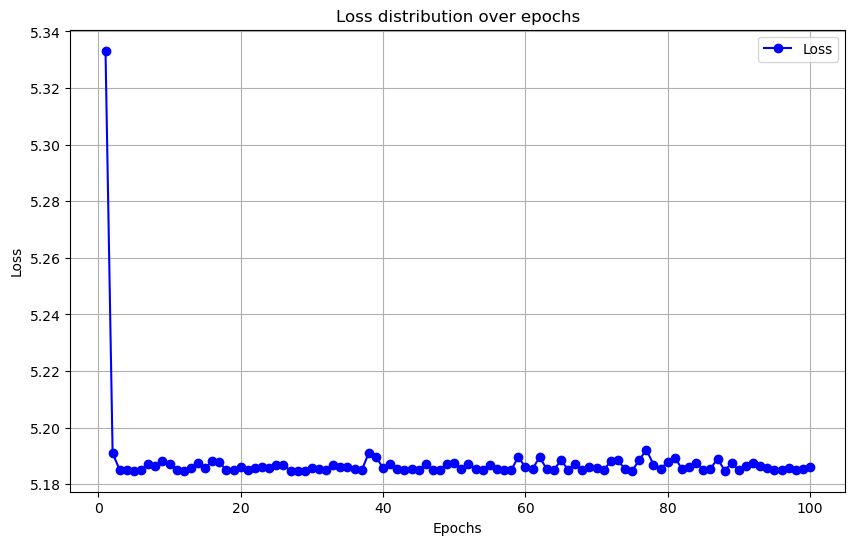

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


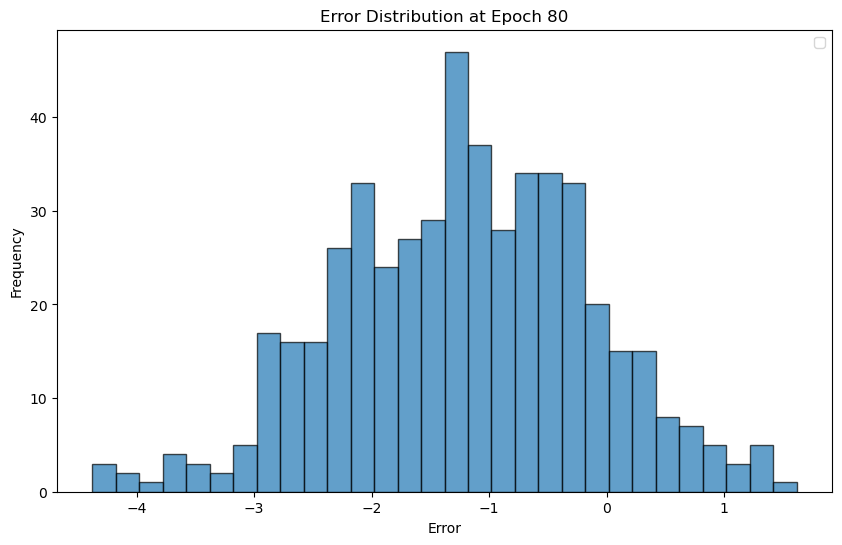

In [260]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="elastic_net", epochs=100, reg_lambda=0.5, alpha=0.2)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

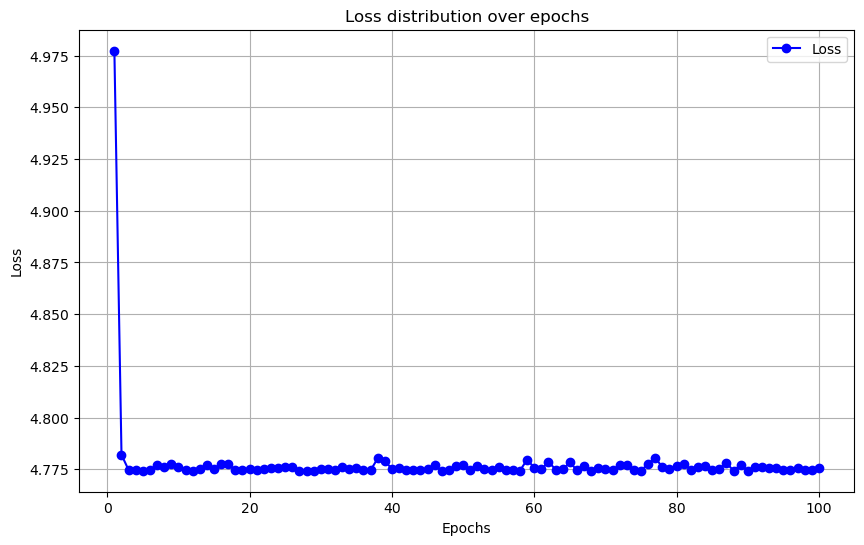

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


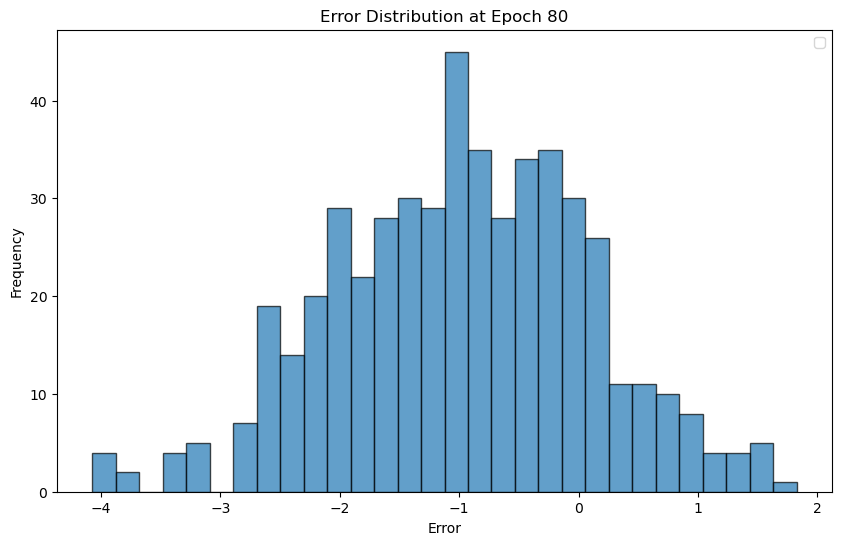

In [261]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="elastic_net", epochs=100, reg_lambda=0.5, alpha=0.5)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

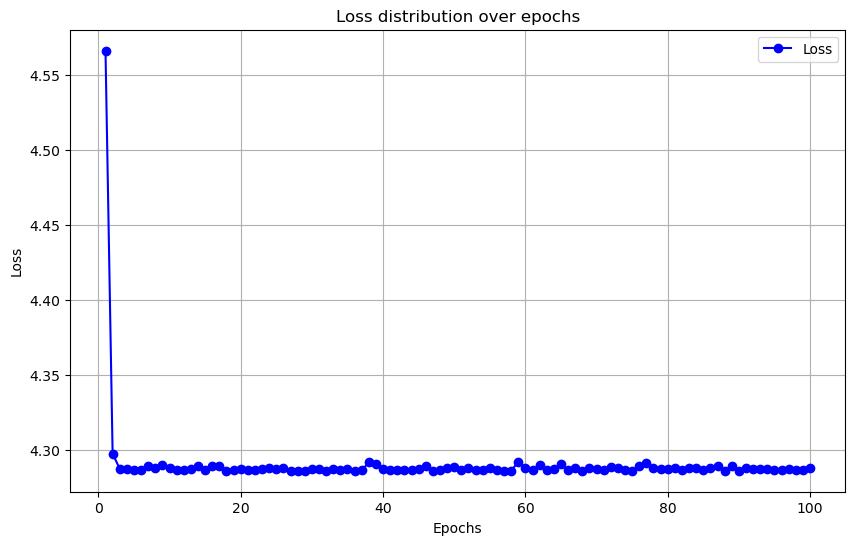

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


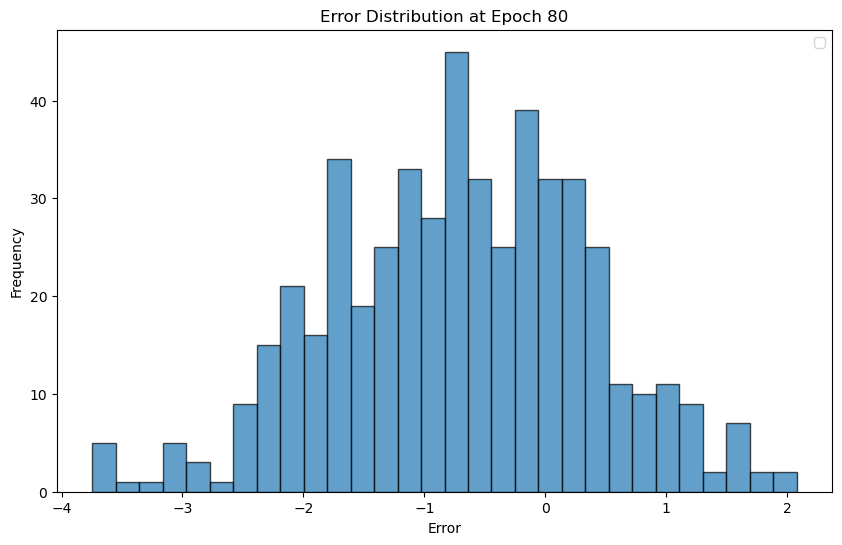

In [262]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="elastic_net", epochs=100, reg_lambda=0.5, alpha=0.8)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

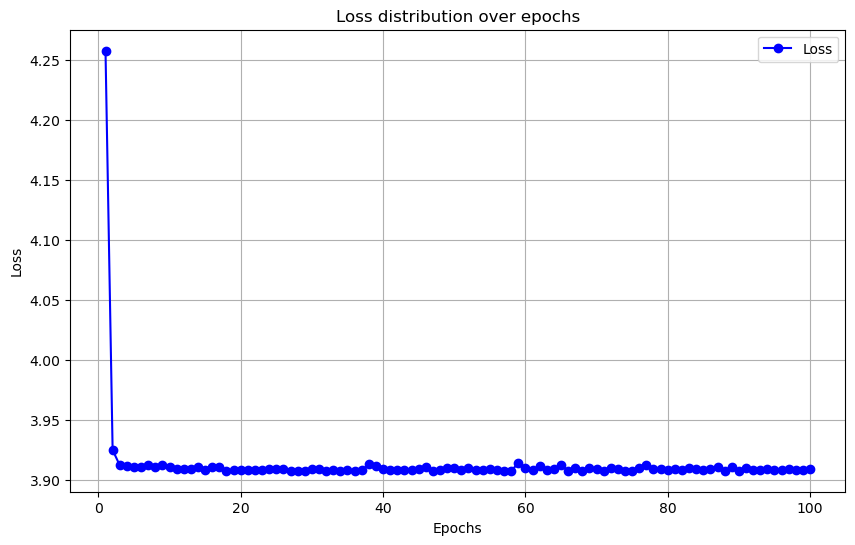

C:\Users\PC_User\AppData\Local\Temp\ipykernel_11756\2903816514.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


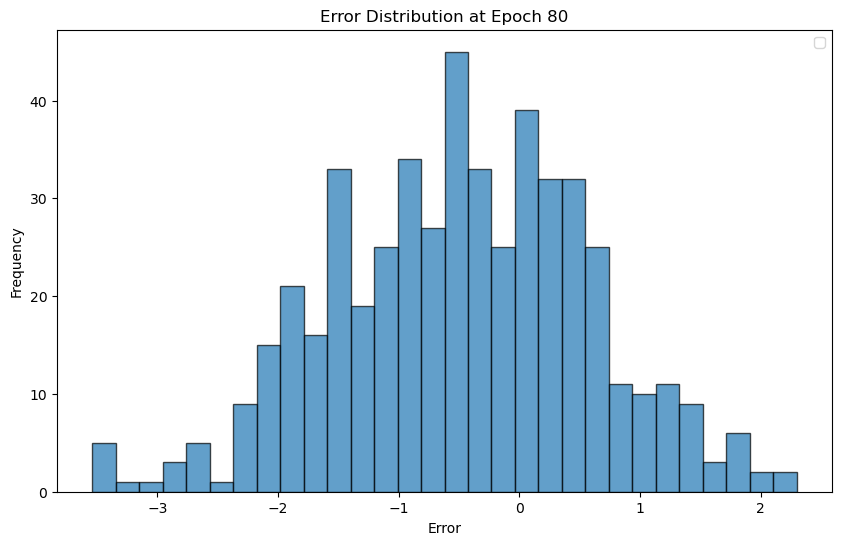

In [263]:
# YOUR CODE HERE
np.random.seed(1408)
X = 2 * np.random.rand(sample_size, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(sample_size)

# Add bias term
X_b = np.c_[np.ones((sample_size, 1)), X]

model = LinearRegressionSGD(lr=0.002, reg_type="elastic_net", epochs=100, reg_lambda=0.5, alpha=1)
model.fit(X_b, y)
model.plot_loss()
model.plot_error_distribution(80)

После третьей эпохи значения при любых параметрах перестают меняться, так что тут нет разницы какой тип регуляризации использовать

## Часть 3. (15 баллов)

**Разбейте ваши данные** на две части в процентном соотношении 80/20, используя функцию `train_test_split` из `scikit-learn`. Первую часть используйте как **тренировочную выборку**, а а вторую - как **тестовую**.

Посмотрите, **как меняются значения лоссов** на тренировочной и тестовой выборке в процессе обучения. Какие модели больше переобучаются, а какие меньше?

*Если вы не понимаете как разбить вашу выборку, посмотрите другой файл домашки `hw3_data_analysis.ipynb`*

In [264]:
# YOUR CODE HERE

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=1408)

In [266]:

print(f'Размеры тренировочной выборки: {X_train.shape}, {y_train.shape}')
print(f'Размеры тестовой выборки: {X_test.shape}, {y_test.shape}')

Размеры тренировочной выборки: (400, 1), (400,)
Размеры тестовой выборки: (100, 1), (100,)


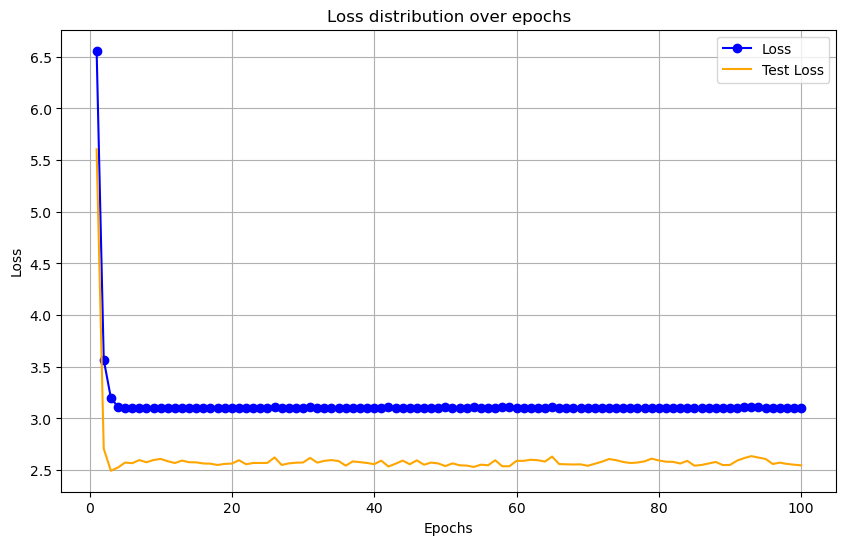

In [267]:
model = LinearRegressionSGD(lr=0.002, reg_type="l1", epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_train, y_train, X_test, y_test)
model.plot_loss()

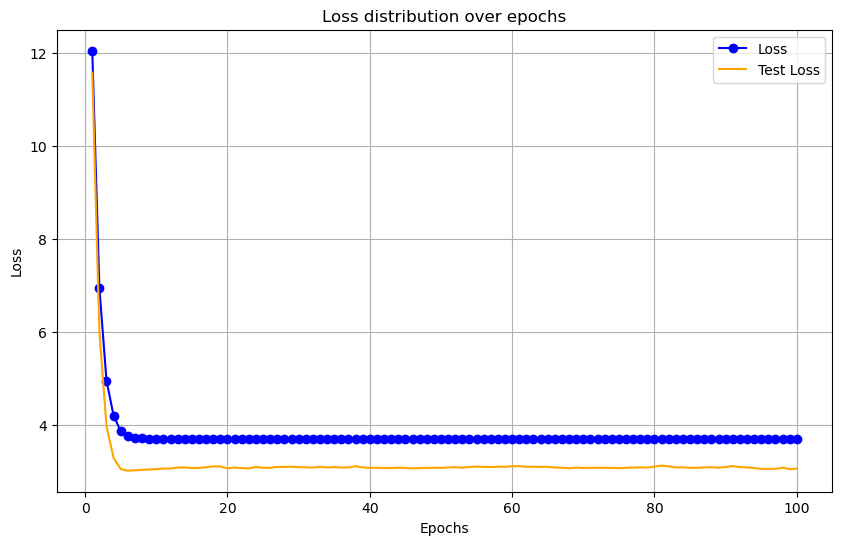

In [268]:
model = LinearRegressionSGD(lr=0.001, reg_type="elastic_net", epochs=100, reg_lambda=0.1, alpha=0.5)
model.fit(X_train, y_train, X_test, y_test)
model.plot_loss()

Лосс на тренировочной выборке лучше, чем на тестовой. 

**Отлично! Вы дошли до конца этой сложной части третьей домашки!**

Вы уже поняли, что мы ждём ваши впечатления. Особенно важно то, сколько времени у вас заняла эта часть. Нравятся ли вам задания с собственной реализацией методов и классов?

## Давайте следующий вопрос

Вставьте картинку, которая ассоциируется с вашим **любимым путешествием**. Пусть это будут горы или озёра, или любимая кафешка за пределами города, или фотка дома с котом, где вы провели какое-нибудь лето. Что угодно, где вам было комфортно и от чего у вас возникают тёплые воспоминания.

In [269]:
#We travel for romance, we travel for architecture, and we travel to be lost.
#Ray Bradbury